<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [ ]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    new_matrix = np.zeros((X[0].shape[0], 1))

    for i in range(len(X)):
        new_matrix += np.dot(X[i], V[i])

    return new_matrix

In [ ]:
x = int(input("Введите количество матриц и векторов: "))

X = []
V = []

for i in range(x):
    matrix = []
    size = int(input("Введите размер матрицы одной цифрой. (Размер матрицы N x N): "))
    for j in range(size):
        row = list(map(int, input(f"Введите {size} элемент(а/ов) матрицы через пробел. Строка {j+1}: ").split(' ')))
        matrix.append(row)
    X.append(np.array(matrix))

    vector = list(map(int, input(f"Введите {size} элемент(а/ов) вектора через пробел. Строка {j+1}: ").split(' ')))
    V.append(np.array(vector)[:, np.newaxis])

sum_prod(X, V)

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [1]:
def binarize(M, threshold=0.5):
    return np.where(M > threshold, 1, 0)

In [4]:
binarize(np.array([[0.1, 0.2], [0.3, 0.4]]), 0.3)

array([[0, 0],
       [0, 1]])

In [5]:
class TestBinarize(unittest.TestCase):

    def test(self):
        self.assertTrue(np.array_equal(binarize(np.array([[0.1, 0.2], [0.3, 0.4]]), 0.3), np.array([[0, 0], [0, 1]])))
        self.assertTrue(np.array_equal(binarize(np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])), np.array([[0, 0], [0, 0], [0, 1]])))

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [6]:
def unique_rows(mat):

    size_x, size_y = np.shape(mat)
    unique_elements = []
    for i in range(size_x):
        elements = []
        for j in mat[i]:
            if j not in elements:
                elements.append(int(j))
        unique_elements.append(elements)

    return unique_elements

def unique_columns(mat):

    mat = np.transpose(mat)
    size_x, size_y = np.shape(mat)
    unique_elements = []
    for i in range(size_y):
        elements = []
        for j in mat[i]:
            if j not in elements:
                elements.append(int(j))
        unique_elements.append(elements)

    return unique_elements

In [7]:
unique_columns(np.array([[1, 2, 3], [4, 5, 6]]))

[[1, 4], [2, 5]]

In [8]:
class TestUniqueRows(unittest.TestCase):

    def test(self):
        self.assertEqual(unique_rows(np.array([[1, 2, 3], [4, 5, 6]])), [[1, 2, 3], [4, 5, 6]])
        self.assertEqual(unique_columns(np.array([[1, 2, 3], [4, 5, 6]])), [[1, 4], [2, 5], [3, 6]])
        self.assertEqual(unique_rows(np.array([[1, 1, 2], [3, 4, 5], [5, 4, 3]])), [[1, 2], [3, 4, 5], [5, 4, 3]])
        self.assertEqual(unique_columns(np.array([[1, 1, 2], [3, 4, 5], [5, 4, 3]])), [[1, 3, 5], [1, 4], [2, 5, 3]])

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

In [9]:
def generate_matrix(m, n):
    size = (m, n)
    matrix = np.random.normal(0, 1, size)
    transformed_matrix = np.transpose(matrix)
    exp_value_row = []
    disp_value_row = []
    exp_value_column = []
    disp_value_column = []

    for i in range(m):
        exp_value_row.append(np.mean(matrix[i]))
        disp_value_row.append(np.mean(matrix[i]))

    for i in range(n):
        exp_value_column.append(np.mean(transformed_matrix[i]))
        disp_value_column.append(np.mean(matrix[i]))

    plt.subplot(2, 2, 1)
    plt.hist(exp_value_row, color='blue')
    plt.title('Математическое ожидание строк')

    plt.subplot(2, 2, 2)
    plt.hist(disp_value_row, color='green')
    plt.title('Дисперсия строк')

    plt.subplot(2, 2, 3)
    plt.hist(exp_value_column, color='orange')
    plt.title('Математическое ожидание столбцов')

    plt.subplot(2, 2, 4)
    plt.hist(disp_value_column, color='red')
    plt.title('Дисперсия столбцов')

    plt.tight_layout()
    plt.show()

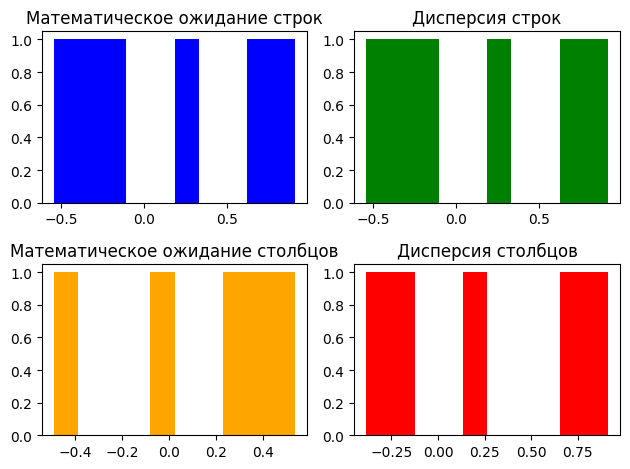

In [10]:
generate_matrix(6, 5)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [11]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n))
    
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i][j] = a
            else:
                matrix[i][j] = b
    
    return matrix

In [12]:
chess(4, 4, 0, 1)

array([[0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [1., 0., 1., 0.]])

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [13]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    # Your code goes here
    pass

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    # Your code goes here
    pass

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [14]:
def count_math(row, w_size):
    exp_value = np.mean(row)
    disp = np.var(row)
    deviation = np.std(row)

    local_min = []
    local_max = []

    for i in range(len(row)):
        if i == 0 and row[i] > row[i+1]:
            local_max.append(row[i].item())
        elif i == 0 and row[i] < row[i+1]:
            local_min.append(row[i].item())
        elif i == len(row)-1 and row[i-1] < row[i]:
            local_max.append(row[i].item())
        elif i == len(row)-1 and row[i-1] > row[i]:
            local_min.append(row[i].item())
        elif row[i-1] < row[i] > row[i+1]:
            local_max.append(row[i].item())
        elif row[i-1] > row[i] < row[i+1]:
            local_min.append(row[i].item())

    res = []
    for i in range(len(row)):
        if i >= w_size - 1:
            res.append((sum(row[i - w_size + 1 : i + 1]) / w_size).item())

    return f"математическое ожидание: {exp_value}\nДисперсия: {disp}\nСКО: {deviation}\nЛокальные максимумы: {', '.join(map(str, local_max))}\nЛокальные минимумы: {', '.join(map(str, local_min))}\nСкользящее среднее: {', '.join(map(str, res))}"

In [15]:
row = np.array([5, 8, 3, 4, 9, 1, 7, 8, 3, 2, 5, 6, 1])
print(count_math(row, 3))

математическое ожидание: 4.769230769230769
Дисперсия: 6.792899408284023
СКО: 2.606319130168833
Локальные максимумы: 8, 9, 8, 6
Локальные минимумы: 5, 3, 1, 2, 1
Скользящее среднее: 5.333333333333333, 5.0, 5.333333333333333, 4.666666666666667, 5.666666666666667, 5.333333333333333, 6.0, 4.333333333333333, 3.3333333333333335, 4.333333333333333, 4.0


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [16]:
def encoding(vector):

    new_matrix = np.zeros((len(vector), int(max(vector))+1))

    for i in range(len(vector)):
        new_matrix[i, vector[i]] = 1

    return new_matrix

In [17]:
encoding(np.array([0, 2, 3, 0]))

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])